Ryan Kirkpatrick, Chris Dierkes

# Hand Strength classifers for NLH Poker

We start by importing our generated dataset of board/hand/labels

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

names = ['HS1', 'HS2','BS1','BS2','BS3','BS4','BS5',
    'HR1','HR2','BR1','BR2','BR3', 'BR4', 'BR5', 'Percentile', 'S1C', 'S2C', 'S3C', 'S4C']
df = pd.read_csv('5k.csv', names = names)

hand_frame = df.drop(['Percentile'], axis = 1)
hand_frame['hand_sum'] = hand_frame['HR1'] + hand_frame['HR2']
hand_frame['board_sum'] = hand_frame['BR1'] + hand_frame['BR2'] + hand_frame['BR3'] + hand_frame['BR4'] + hand_frame['BR5']
label_frame = df['Percentile']

hand_array = hand_frame.to_numpy()
label_array = label_frame.to_numpy()

X = hand_array  
y = label_array
print(X)
print(y)
#import data


[[ 2  1  3 ...  1  3 45]
 [ 3  1  3 ...  1  4 45]
 [ 4  1  3 ...  1  5 45]
 ...
 [ 4  4  4 ...  3 21 33]
 [ 4  4  4 ...  3 24 33]
 [ 4  4  4 ...  3 25 33]]
[ 4.16281221  4.16281221  4.16281221 ... 99.76873265 99.86123959
 99.95374653]


# Additional Features
We added new features based on our knowledge of the game in addition to our raw generated hand vectors. 

In [16]:
print(hand_frame)

         HS1  HS2  BS1  BS2  BS3  BS4  BS5  HR1  HR2  BR1  BR2  BR3  BR4  BR5  \
0          2    1    3    1    4    1    1    2    1   12   11    9    8    5   
1          3    1    3    1    4    1    1    3    1   12   11    9    8    5   
2          4    1    3    1    4    1    1    4    1   12   11    9    8    5   
3          3    1    3    1    4    1    1    2    1   12   11    9    8    5   
4          4    1    3    1    4    1    1    3    1   12   11    9    8    5   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5404995    4    4    4    4    2    4    1   13    6   10    9    8    5    1   
5404996    4    4    4    4    2    4    1   13    7   10    9    8    5    1   
5404997    4    4    4    4    2    4    1   13    8   10    9    8    5    1   
5404998    4    4    4    4    2    4    1   13   11   10    9    8    5    1   
5404999    4    4    4    4    2    4    1   13   12   10    9    8    5    1   

         S1C  S2C  S3C  S4C

Now, We want to create a training and testing split for our data.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


# K-Nearest Neighbors Regression

Here we implement the KNN classifier with K=3:

In [18]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors = 3)
KNN.fit(X_train, y_train)
KNN.score(X = X_test,y = y_test)


0.7772464998871382

The cell below gives some example predictions on 20 of our test points. 

In [27]:
print(X_test[20:40])
print(KNN.predict(X_test[20:40]))
print("-------------")
print(y_test[20:40])

import statistics
predictions = KNN.predict(X_test[0:len(X_test)])
difference = []
combo = zip(predictions, y_test)
for y_test_i, predictions_i in combo:
    difference.append(y_test_i - predictions_i)
mean = statistics.mean(difference)
standardDeviation = statistics.stdev(difference)
print(standardDeviation)
print(mean)

[[ 3  4  4  1  2  4  2 10  2 13 11  9  8  6  1  2  0  2 12 47]
 [ 4  2  2  4  3  2  4  8  4  5  4  3  3  2  0  2  1  2 12 17]
 [ 4  3  4  1  4  4  3 10  8  7  7  5  1  1  1  0  1  3 18 21]
 [ 4  4  1  2  3  2  4  6  5 13  9  8  5  1  1  2  1  1 11 36]
 [ 1  4  2  4  3  1  1 12  3 12 11 10  4  2  2  1  1  1 15 39]
 [ 4  3  4  4  3  4  4 12  6 11  6  5  2  1  0  0  1  4 18 25]
 [ 1  1  3  4  1  3  1 12  6 13  9  5  4  4  2  0  2  1 18 35]
 [ 1  1  2  1  2  1  3 11  6 10  7  4  4  3  2  2  1  0 17 28]
 [ 3  4  3  3  3  1  3  6  5 12 10  9  8  2  1  0  4  0 11 41]
 [ 4  2  3  4  4  4  3 12  9 13  7  4  3  1  0  0  2  3 21 28]
 [ 2  4  3  2  3  1  2  6  5 10  8  6  6  1  1  2  2  0 11 31]
 [ 1  1  2  4  3  2  4 11  5 13 12 10 10  1  0  2  1  2 16 46]
 [ 3  2  4  4  1  2  2  7  7 13 11  9  5  3  1  2  0  2 14 41]
 [ 3  3  1  1  1  2  4  7  6 13 11  8  3  2  3  1  0  1 13 37]
 [ 2  1  3  1  4  2  2  9  5 13 10  6  5  3  1  2  1  1 14 37]
 [ 1  4  2  3  3  2  2  9  2 13 12 11  8  4  0  3  2  0

# Comparing different K-Values
Here we want to see the effect of using different values of K on our score. We are using a smaller dataset here.  

In [6]:
df = pd.read_csv('1k.csv', names = names)

hand_frame = df.drop(['Percentile'], axis = 1)
hand_frame['hand_sum'] = hand_frame['HR1'] + hand_frame['HR2']
hand_frame['board_sum'] = hand_frame['BR1'] + hand_frame['BR2'] + hand_frame['BR3'] + hand_frame['BR4'] + hand_frame['BR5']
label_frame = df['Percentile']

hand_array = hand_frame.to_numpy()
label_array = label_frame.to_numpy()

X = hand_array  
y = label_array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


scores = []
for i in range(4):
    KNNs = KNeighborsRegressor(n_neighbors = i+2)
    KNNs.fit(X_train, y_train)
    scores.append(KNNs.score(X = X_test,y = y_test))
scores

[0.7725089932944853,
 0.7921838815414838,
 0.7750857070267797,
 0.7549483191866618]

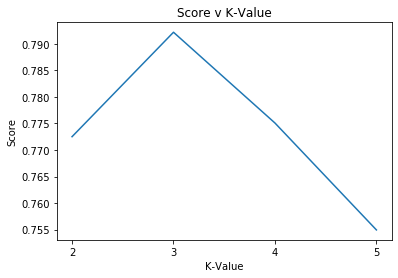

In [14]:
plt.plot([2, 3, 4, 5], scores)
plt.xticks(ticks = [2, 3, 4, 5])
plt.title("Score v K-Value")
plt.ylabel("Score")
plt.xlabel("K-Value")
plt.show()

# Other Algorithms

Linear Regression

In [24]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
y_preds = regression.predict(X_test)
score = r2_score(y_test, y_preds)
print(score)

print(mean_squared_error(y_test, y_preds))

0.08904140784125036
750.6136609281865


In [26]:
import statistics
predictions = regression.predict(X_test[0:len(X_test)])
difference = []
combo = zip(predictions, y_test)
for y_test_i, predictions_i in combo:
    difference.append(y_test_i - predictions_i)
mean = statistics.mean(difference)
standardDeviation = statistics.stdev(difference)
print(standardDeviation)
print(mean)

27.39731728744468
0.03688832293362891
